# ILI9341

Abbreviation: For Some Reason That I Can't Explain, FSRTICE

Line by line breakdown of the ILI9341 Library used in HAL STM32. Suggested to have an alternate copy of the complete code because of several detours in the process of explaining the STM32 Architecture or Register manipulations as well as the C++ syntax.  

[Detour - *SPI_HandleTypeDef hspi1*](#1) 

<a id='1_r'></a>

[Detour - Function Prototypes](#2)

<a id='2_r'></a>

**The above codes are written for us by the STM32cubeide. Below are the codes which are written by the programmer(human).**

[Detour - Struct *TS_TOUCH_DATA_Def*](#3)

<a id='3_r'></a>

Moving on, we now enter the *int main(void)* function. 

This code is nothing more than initializing the Cube HAL. 

[Detour - *SystemClock_Config()*](#4)

<a id='4_r'></a>


Take note that this function as well as other functions are function prototype located at the lower part of the main.c file. However, we have to look into these functions now so we can establish the importance of the C struct in the STM32 programming.

[Detour - *MX_GPIO_Init()*](#5)

<a id='5_r'></a>

We can see the pinouts from the original video



We'll these codes are pretty much self explanatory by now. Futhermore, there's not much of a documentation about these functions so we won't dive into these and leave as they are.

The function definition is written at MY_ILI9341.c file. This will be just one of the many core functions of these library so we should discuss each lines. 

## ILI9341_Init()

What we have here is called **Passing Structure to Function Call by Reference**

Just like any other data type, we can pass structure into a function. We could do this in two ways:

- passing individual structure elements
- passing the entire structure

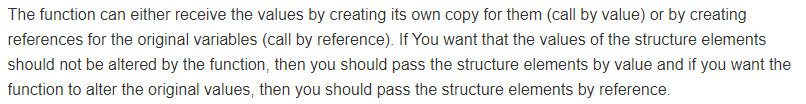

Structures can be passed by reference just as other simple types. When a structure is passed by reference the called function declares a reference for the passed structure and refers to the original structure elements through its reference. Thus, the called function works with the original values. Further reading can be found here: [link1](https://codescracker.com/cpp/cpp-pasing-structures-to-functions.htm), [link2](https://www.codesdope.com/cpp-structure/)

This means we are passing 4 structs into our function and those are:

- *SPI_HandleTypeDef *spiLcdHandle*
- *GPIO_TypeDef *csPORT*
- *GPIO_TypeDef *dcPORT*
- *GPIO_TypeDef *resetPORT*

And 3 values 

- *uint16_t csPIN*
- *uint16_t dcPIN*
- *uint16_t resetPIN*

Moving on to the next line.

### What is memcpy?

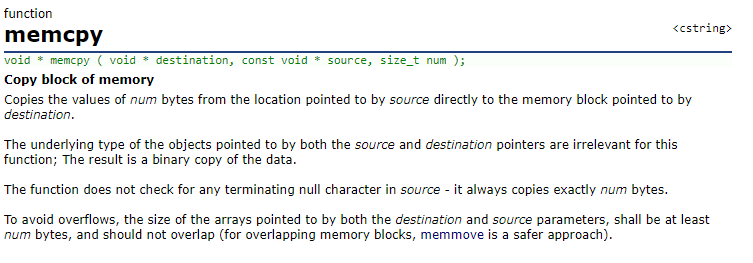

 Basically, what it does is that it copies the block of memory from the source to destination and the number of bytes to copied is depending on the last parameter. Since we have Reference Operate, that is, *&lcdSPIhandle*, it means that *lcdSPIhandle* is a pointer. A more detailed explanation can be watched on this [link.](https://www.youtube.com/watch?v=pKYvhURF3Z4.)
 
Hence, here we are copying the struct *spiLcdHandle* to another memory address, that is, *&lcdSPIhandle*. We've already encountered the *sizeof()* function. For a quick reference, 
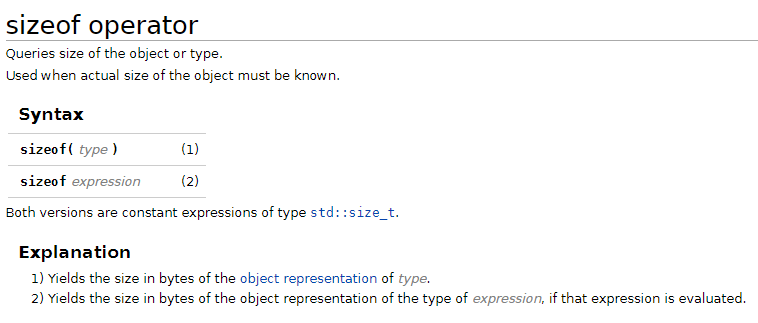

If you're asking how many bytes exactly it is, 
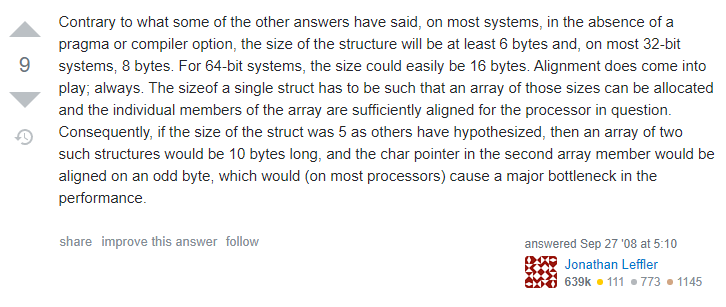

It's not very clear to me as well how it *memcpy* exactly works but atleast we have an idea. Moving forward! 

Since we haven't defined anywhere in the code the varaibles *tftCS_GPIO* and *tftCS_PIN*, it means we are defining them here and they are local to the function. A quick recap can be watched [here.](https://www.youtube.com/watch?v=gb3yUqbwhvQ) 

We can see the pinouts from the original video

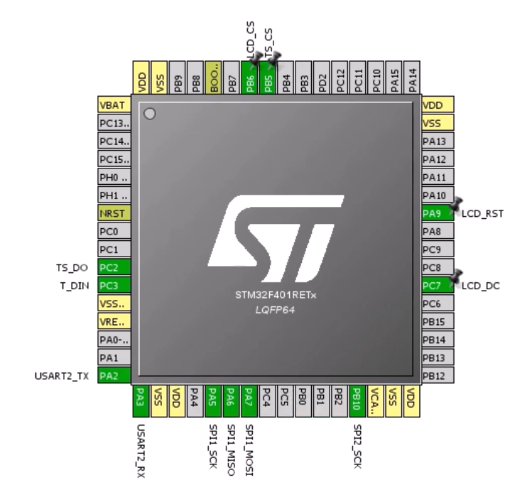

In our function call, 

We can see *csPORT* is 

this is quite confusing especially is you are coming from Arduino programming.

<a id='1'></a>

First, the code *SPI_HandleTypeDef hspi1;* is struct initialization or initializing the struct *SPI_HandleTypeDef*. What this means is we create a copy of the struct *SPI_HandleTypeDef* and give it a name *hspi1*. Further reading can be found in this [link](https://www.learncpp.com/cpp-tutorial/47-structs/#:~:text=Initializing%20structs%20by%20assigning%20values,a%20struct%20at%20declaration%20time.)

The *SPI_HandleTypeDef* is a C struct which is defined in the following way. 

![SPI_struct.PNG](ILI9341_Images/SPI_struct.PNG)

Notice that the declaration of the struct is with underscores. 

![double_underscore.PNG](ILI9341_Images/double_underscore.PNG)

![double_underscore1.PNG](ILI9341_Images/double_underscore1.PNG)

## So what exactly are identifiers?

![Identifier.PNG](ILI9341_Images/Identifier.PNG)

The reason why we are using structs is because 
![StructvsClass.PNG](ILI9341_Images/StructvsClass.PNG)

[Return - *SPI_HandleTypeDef hspi1*](#1_r)

                                                   <intentional space>

<a id='2'></a>

A function prototype is closely related to the definition of a prototype. Below we'll understand why it is necessary to have

![function_prototype.PNG](ILI9341_Images/function_prototype.PNG)

![function_prototype1.PNG](ILI9341_Images/function_prototype1.PNG)

[Return - Function Prototypes](#2_r)

                                                   <intentional space>

<a id='3'></a>

As what we know this is another struct initialization. By clicking into the definition, we get

This is defined at TC2046.h

[Return - Struct *TS_TOUCH_DATA_Def*](#3_r)

                                                   <intentional space>

<a id='4'></a>

This code is similar to HAL init but instead, it configures the correct clock tree of our MCU. 

![System_clock_config.PNG](ILI9341_Images/System_clock_config.PNG)

[Return - *SystemClock_Config()*](#4_r)

                                                   <intentional space>

<a id='5'></a>

## *MX_GPIO_Init()*

[Detour - Struct *GPIO_InitTypeDef*](#5.1)

<a id='5.1_r'></a>

These are just some clock tree configurations. We will not be discussing the clock tree configuration for now but the *RCC* tells us its about the clock configuration of these I/O pins that we've configured in the Clock Configuration of STM32CubeIDE. 

[Detour - *HAL_GPIO_WritePin()*](#5.2)

<a id='5.2_r'></a>

And pretty much the same thing applies for the other two functions except that we have an Logical OR: *TS_CS_Pin|LCD_CS_Pin*. Which means both pins share the same struct *GPIOB*. FSRTICE, the *HAL_GPIO_WritePin()* is called even before the the pins are configured.  

[Further discussion - Naming convetion](#5.3)

<a id='5.3_r'></a>

The next block of lines will configure the pins.

The first few lines are just writing values to each member of the struct *GPIO_InitStruct* that we initialized. The last line is the most interesting line in this block. It's a function that accepts a pointer variable. It's quite hard to understand in this case. Hence, it will be better to look at the definition of *HAL_GPIO_Init*.

[Detour - *HAL_GPIO_Init()*](#5.4)

<a id='5.4_r'></a>

                                                   <intentional space>

<a id='5.1'></a>

We are initializing the struct *GPIO_InitStruct*. This means we create a copy of the struct *GPIO_InitTypeDef* and name it *GPIO_InitStruct*. The full definition of the *GPIO_InitTypeDef* can be seen below.

<a id='5.4.5'></a>
![GPIO_InitTypeDef.PNG](ILI9341_Images/GPIO_InitTypeDef.PNG)
[Return - Image Only Reference](#5.4.5_r)

![GPIO_InitTypeDef1.PNG](ILI9341_Images/GPIO_InitTypeDef1.PNG)

[Return - Struct *GPIO_InitTypeDef*](#5.1_r)

                                                   <intentional space>

<a id='5.2'></a>

This is nothing more than the writing a zero to the exact Pin. 

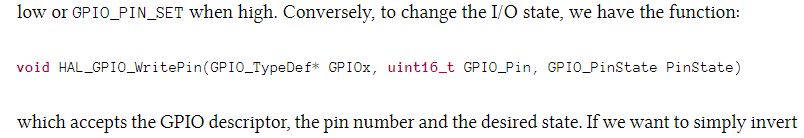

The STM32 uses the naming convention of RESET for LOW and SET for HIGH. Hence, *GPIO_PIN_RESET* means driving that particular pin LOW.

[Return - *HAL_GPIO_WritePin()*](#5.2_r)

                                                   <intentional space>

<a id='5.3'></a>

Moreover, it would be good to discuss another weird naming convention that is implemented by STM32CubeIDE.

I came to realize that if there is only one pin initialized for a given port, it will adapt the name that you gave to in the Pin Configuration of STM32CubeIDE. Look carefully at *LCD_RST_GPIO_Port* which is located at PC7. 

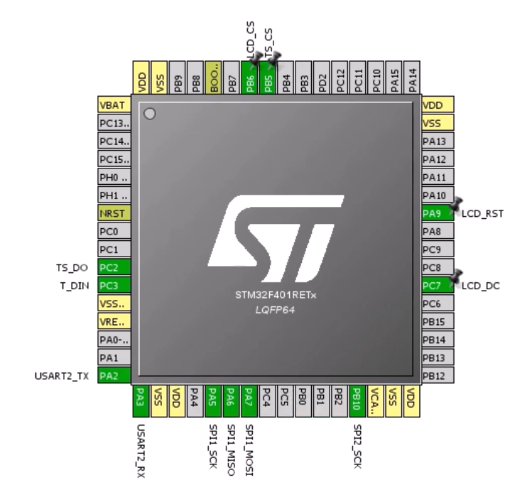

Now, there are no other I/O pins for port C or GPIOC and that is why its name is  LCD_RST + _ GPIO_Port. However, if there are two pins in a given port, like the case of *TS_CS_Pin* and *LCD_CS_Pin* which are both in Port B, hence they are given a name of *GPIOB*. 

Now, you might ask what does *LCD_RST_GPIO_Port* even mean. We'll they manage to place its definition in main.h private defines.

<a id='5.4.6'></a>
![private_defines.PNG](ILI9341_Images/private_defines.PNG)
[Return - Image Only Reference](#5.4.6_r)

[Return - Naming convetion](#5.3_r)

                                                   <intentional space>

<a id='5.4'></a>

## *HAL_GPIO_Init()*

Initialize some variables and set their values to zero. 

[Detour - U suffix](#5.4.1) 

<a id='5.4.1_r'></a>

Initialize some variables and set their values to zero. 

Perhaps you've already encountered the function *is_integer()* which is a Python function that check if the given output is an integer. This is actually the same thing for *IS_GPIO_ALL_INSTANCE*, *IS_GPIO_PIN*, etc.

[Detour - *assert_param()*](#5.4.2) 

<a id='5.4.2_r'></a>

The *GPIO_NUMBER* is defined at the beginning of hal_gpio.c file.

Moving on,

This line is just a bit shifting. Basically what this means is that we are shifting the binary of 0x01 to left depending on the current value of the variable *position*. Since *position* is an unsigned 32 bit. It means there are 4,294,967,295 possible values for *position* but we know that we will never reach that value since *GPIO_NUMBER* is only equal to 16. 

[Detour - Arrow Operator](#5.4.3) 

<a id='5.4.3_r'></a>

If you recall, the function

accepts two pointers, which holds the addresses of the two structs *GPIO_TypeDef* and *GPIO_InitTypeDef*. We've already seen the struct definition of *GPIO_InitTypeDef* [previously](#5.4.5). <a id='5.4.5_r'></a>  

It is important to note that the pointer declaration is done in the function parameters of *HAL_GPIO_Init()*. What this mean is whatever address is passed in this function, the two pointers will be called **GPIOx* and **GPIO_Init*. What we have here is called Passing Structure to Function Call by Reference.

[Detour - Passing Structure to Function Call by Reference](#5.4.4) 

<a id='5.4.4_r'></a>

To recall things, the function in main.c is

Now, its clear that the second argument is an address of the struct instance *GPIO_InitStruct* but the first argument *LCD_RST_GPIO_Port* doesn't look like an address at all. We already looked up at the definition of *LCD_RST_GPIO_Port* previously [here](#5.4.6). <a id='5.4.6_r'></a> 
We can see that

Looking at the definition of *GPIOA*, 

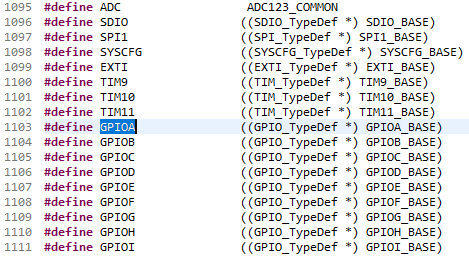

We know that this is a macro, but we don't quite understand the syntax. It seems that it is making an instance of the struct *GPIO_TypeDef* and then making *GPIO* as the pointer that holds the address of the instance of the struct. Unfortunately, we can't really confirm the meaning of the syntax as the author can't find a similar one.

We could stop right here but we could also continue. But in order to do see. We need have to refer to the [datasheet](https://www.st.com/resource/en/datasheet/dm00037051.pdf) of STM32F4 family. Before we continue to a whole new world of registers. Let's first summarize why we've come this far.

First, we dive into the definition of 

which was written inside the main.c. Inside the *static void MX_GPIO_Init(void)* we've found the code 

And the last code leads us to *HAL_GPIO_Init()*. Inside the *HAL_GPIO_Init()*, the last code we encountered is 

We now understand that *GPIO_Init* is a passing structure to function call by reference which is a fancy name if you for just passing the address of a struct into a function so that it won't create a copy of the struct instance but rather change the values of struct instance. 

Moreover, *GPIO_Init* is a pointer to the struct containing the member Pin = LCD_DC_Pin. 

Now, we can easily see that *GPIO_Init->Pin* should be equal to *LCD_DC_Pin*. In the private defines of main.h we saw that 

which is finally tabulated at hal_gpio.h

![GPIO_PINS.PNG](ILI9341_Images/GPIO_PINS.PNG)

In [ ]:
The next line of code is 

This will happen when *position* = 7 since the binary of *(uint32_t)(GPIO_Init->Pin)* = 0x00800 = 10000000.

Don't get confused with *ioposition* and *position*. These are two different variables. The *position* is the index of the for-loop while *ioposition* is the left shifting of the binary 0bxxx01.

[Detour - Alternate Functions](#5.4.7) 

<a id='5.4.7_r'></a>

For the *GPIO_TypeDef*

![GPIO_TypeDef.PNG](ILI9341_Images/GPIO_TypeDef.PNG)

which can be found at hal_gpio.h file. Now, we have to find where did the instance of the struct *GPIO_TypeDef* was created. 



                                                   <intentional space>

<a id='5.4.1'></a>

The U suffix:

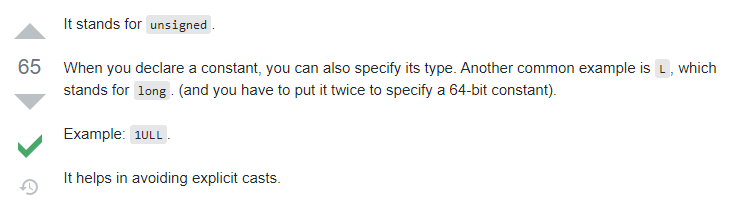

[Return -  U suffix](#5.4.1_r) 

                                                   <intentional space>

<a id='5.4.2'></a>

The *assert_param()*: 

![assert_param.PNG](ILI9341_Images/assert_param.PNG)

[Return - *assert_param()*](#5.4.2_r) 

                                                   <intentional space>

<a id='5.4.3'></a>

#### The arrow operator

The arrow operator is used to access the variables inside a struct using a pointer. Say we have a struct *student*

Initialize the struct, call it *Bob*.

Next, we defined a pointer that holds the address of struct *Bob*. 

Then we two ways of accessing the members of *Bob*. Either by using the dot operator or by using arrow operator. The dot operator is used by calling the struct name or identifier itself.

or we could aso do the same thing by using our pointer 

A quick demonstration can be seen [here](https://www.youtube.com/watch?v=jH2b6bKgrhs).

[Return - Arrow Operator](#5.4.3_r)

                                                   <intentional space>

<a id='5.4.4'></a>

#### Passing Structure to Function Call by Reference



Just like any other data type, we can pass structure into a function. We could do this in two ways:

- passing individual structure elements
- passing the entire structure

![struct_function.PNG](ILI9341_Images/struct_function.PNG)

Structures can be passed by reference just as other simple types. When a structure is passed by reference the called function declares a reference for the passed structure and refers to the original structure elements through its reference. Thus, the called function works with the original values. Further reading can be found here: [link1](https://codescracker.com/cpp/cpp-pasing-structures-to-functions.htm), [link2](https://www.codesdope.com/cpp-structure/)

[Return - Passing Structure to Function Call by Reference](#5.4.4_r) 

                                                   <intentional space>

<a id='5.4.7'></a>

## Alternate Functions

Most of GPIOs have “alternate functions”, that is they can be used as I/O pin for at least one internalperipheral. However, keep in mind that an I/O can be associated to only one peripheral at a time.

![alternate_functions.PNG](ILI9341_Images/alternate_functions.PNG)
![alternate_functions1.PNG](ILI9341_Images/alternate_functions1.PNG)

[Return - Alternate Functions](#5.4.7_r) 